In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the sunspots dataset from a CSV file
data = pd.read_csv('sunspots.csv',index_col='Date',parse_dates= ['Date']).drop('Unnamed: 0',axis =1)
data.head()
data.columns

Index(['Monthly Mean Total Sunspot Number'], dtype='object')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Root Mean Squared Error (RMSE): 70.70232945409624
Mean Absolute Percentage Error (MAPE): 1966-09-30 00:00:00                 NaN
1966-10-31 00:00:00                 NaN
1966-11-30 00:00:00                 NaN
1966-12-31 00:00:00                 NaN
1967-01-31 00:00:00                 NaN
                                     ..
2020-10-31 00:00:00                 NaN
2020-11-30 00:00:00                 NaN
2020-12-31 00:00:00                 NaN
2021-01-31 00:00:00                 NaN
Monthly Mean Total Sunspot Number   NaN
Length: 654, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


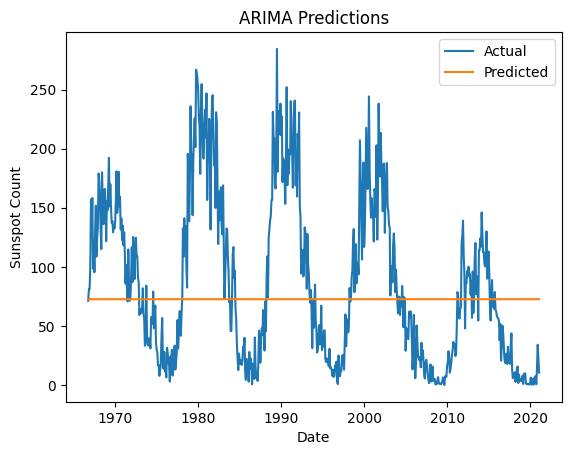

In [10]:

# Split the data into train and test sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Fit the ARIMA model
order = (4, 1, 0)  # Adjust the order of ARIMA model as per your requirements
model = ARIMA(endog=train_data, order=order)
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Evaluate the model
mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# Visualize the predictions
plt.plot(test_data.index, test_data.values, label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Sunspot Count')
plt.title('ARIMA Predictions')
plt.legend()
plt.show()
